# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions."

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
## Question 1.1 ## 
import pandas as pd 
#Clean Price with validation for num < 1000 
df = pd.read_csv('./data/airbnb_hw.csv')
df["Price"].unique()
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].astype(float)

df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145.0,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37.0,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28.0,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199.0,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549.0,96.0


In [11]:
## Question 1.2 ## 
df = pd.read_csv('./data/mn_police_use_of_force.csv')

missing_proportion = df['subject_injury'].isna().mean()

df['subject_injury'] = df['subject_injury'].fillna('No')

cross_tab = pd.crosstab(df['subject_injury'], df['force_type'], dropna=False)
print("Cross-tabulation between subject_injury and force_type:")
print(cross_tab)

df.head()

Cross-tabulation between subject_injury and force_type:
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  2          8144               1552        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             60                108           87   
Yes                            44                 40            0   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                                   1                          170   
Yes                                  2                            0   

force_type      Police K9 Bite  Taser  
subject_injury                         
No                          33   

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,No,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,No,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,No,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,No,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,No,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [10]:
print(f"Proportion of missing `subject_injury` values: {missing_proportion:.2%}")


Proportion of missing `subject_injury` values: 76.19%


The proportion of subject_inquiry values is concerning because the proportion is over half of our data. 


In [ ]:
## Question 1.3 ## 


Regarding the results from the cross tabulation, there are more missing values when the force type is bodily force, chemical irritant, and taser. There are less missing values for Baton, or K9 bites

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [71]:
import pandas as pd 
import requests 
import matplotlib.pyplot as plt


df = pd.read_excel("/Users/kimberlyliu/Downloads/DS 3001/wrangling/GSAF5.xls")
df.drop(columns=[  'pdf' ,'href formula','href','Case Number.1', 'Case Number',  'original order', 'Unnamed: 21', 'Unnamed: 22'], inplace=True)

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'] = df['Year'].astype('Int64') 

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].astype('Int64') 

df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,2025-01-23 00:00:00,2025,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,Minor bite to lower body,N,1711hrs,Not stated,Bob Myatt GSAF
1,2025-01-22 00:00:00,2025,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,None - chunk of surfboard bitten out,N,1600hrs,Bronze whaler,Bob Myatt GSAF
2,2025-01-11 00:00:00,2025,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,Bitten on the arm,N,1340hrs,Not stated,Kevin McMurray Trackingsharks.com
3,2025-01-02 00:00:00,2025,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,Severe arm injury and delay in medical treatme...,Y,1615hr,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith
4,2025-01-02 00:00:00,2025,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,Body not recovered,Y,1710hr,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...


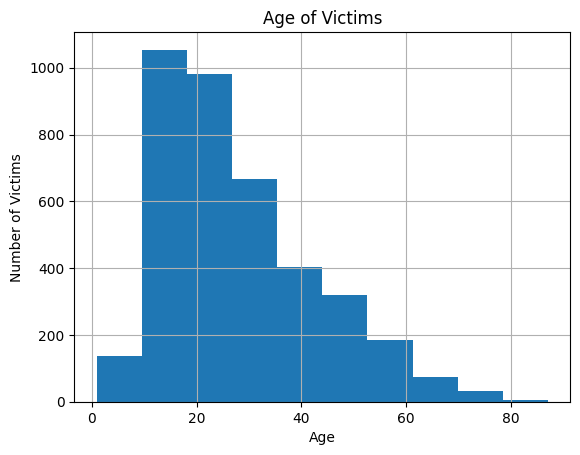

In [72]:
import matplotlib.pyplot as plt

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].astype('Int64') 

df["Age"].hist()
plt.title("Age of Victims")
plt.xlabel("Age")
plt.ylabel("Number of Victims")
plt.show()


In [73]:
prop = df[df['Sex'] == "M"].shape[0] /  df[df['Sex'] == "F"].shape[0]

print("The proportion of victims that are male is", prop, "%")

The proportion of victims that are male is 7.087121212121212 %


In [74]:
df['Type'] = df['Type'].str.strip().str.capitalize()  # Standardize case and strip whitespace
valid_types = ['Provoked', 'Unprovoked', 'Unknown']
df['Type'] = df['Type'].where(df['Type'].isin(valid_types), 'Unknown')

df["Type"].unique()

total_attacks = len(df)
unprovoked_attacks = df[df['Type'] == 'Unprovoked'].shape[0]
unprovoked_prop = unprovoked_attacks / total_attacks
print("The proportion of unprovoked attacks is", unprovoked_prop,"%")

The proportion of unprovoked attacks is 0.7369851258581236 %


In [75]:
# Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.

df['Fatal Y/N'] = df['Fatal Y/N'].str.strip().str.capitalize()  # Standardize case and strip whitespace
valid_types = ['Y', 'N', 'Unknown']
df['Fatal Y/N'] = df['Fatal Y/N'].where(df['Fatal Y/N'].isin(valid_types), 'Unknown')
df['Fatal Y/N'].unique()
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,2025-01-23 00:00:00,2025,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,Minor bite to lower body,N,1711hrs,Not stated,Bob Myatt GSAF
1,2025-01-22 00:00:00,2025,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,None - chunk of surfboard bitten out,N,1600hrs,Bronze whaler,Bob Myatt GSAF
2,2025-01-11 00:00:00,2025,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,Bitten on the arm,N,1340hrs,Not stated,Kevin McMurray Trackingsharks.com
3,2025-01-02 00:00:00,2025,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,Severe arm injury and delay in medical treatme...,Y,1615hr,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith
4,2025-01-02 00:00:00,2025,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,Body not recovered,Y,1710hr,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...


In [76]:
'''
#8. Are sharks more likely to launch unprovoked attacks on men or women? 
# Is the attack more or less likely to be fatal when the attack is provoked or unprovoked?
#  Is it more or less likely to be fatal when the victim is male or female? 
# How do you feel about sharks?
'''

unprovoked_attacks = df[df['Type'] == 'Unprovoked']
unprovoked_men =  unprovoked_attacks[unprovoked_attacks['Sex'] == 'M'].shape[0]
unprovoked_women =  unprovoked_attacks[unprovoked_attacks['Sex'] == 'F'].shape[0]

print("The number of unprovoked attacks on men are", unprovoked_men)
print("The number of unprovoked attacks on women are", unprovoked_women)

provoked_attacks = df[df['Type'] == 'Provoked']
provoked_fatality = provoked_attacks[provoked_attacks['Fatal Y/N'] == 'Y'].shape[0]
unprovoked_fatality = unprovoked_attacks[unprovoked_attacks['Fatal Y/N'] == 'Y'].shape[0]

print("The number of fatal provoked attacks are", provoked_fatality)
print("The number of fatal unprovoked attacks are", unprovoked_fatality)

fatal_only = df[df['Fatal Y/N'] == 'Y']
men_fatal = fatal_only[fatal_only["Sex"] == "M"].shape[0]
women_fatal = fatal_only[fatal_only["Sex"] == "F"].shape[0]

print("The number of fatal attacks on men are", men_fatal)
print("The number of fatal attacks on women are", women_fatal)


The number of unprovoked attacks on men are 4311
The number of unprovoked attacks on women are 670
The number of fatal provoked attacks are 21
The number of fatal unprovoked attacks are 1252
The number of fatal attacks on men are 1240
The number of fatal attacks on women are 120


Shark attacks are more likely to launch unprovoked attacks on men. 
The attack is more likely to be fatal when the attack is unprovoked. 
It is more likely to be fatal when the victim is male. 
As a woman, I feel safer than men. This doesn't change my perception of the danger of sharks. 

In [77]:
'''
9. What proportion of attacks appear to be by white sharks? 
(Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)'''

df['Species '] = df['Species '].str.strip().str.capitalize()  # Standardize case and strip whitespace
df['Species '] = df['Species '].fillna('Unknown')
df['Species '] = df['Species '].str.split().str.get(0)
total_attacks = len(df)
proportion_white = df[df['Species '] == "White"].shape[0] / total_attacks
print("The proportion of attacks by white sharks are", proportion_white, "%")


The proportion of attacks by white sharks are 0.0710812356979405 %


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

1. The most recent US Census gathered data on race by self-identification. 
2. We gather this data for resource allocation. This race and ethnicity data helps determine how federal and state funds are distributed for programs like education funding, healthcare services, and infrastructre development. This is important because it also is used during redistricting and representation. The data quality matters to  ensure fair representation and prevent resource misallocation. 
3. The Census was successful with the multiple response options, allowing respondents to select multiple racial categories. In additon, the multiple data collection options via online, paper, phone, or in-person, reduces the barriers for certain communities. Gender identity questions could be included to add an important dimension of diversity in the population. There should be a redefinition of race and ethnicity to allow for intersectional responses that acknowledge overlapping identities. To increase  responses that are representative, there should be more write-in options in the employment data and education statistics to caputre diverse communities. 
4. To disclose sex and gender, there was a single binary question regarding sex, with two response options, Male and Female. While this makes it simple and consistent for historical comparisons, it fails to capture information on non-binary, transgender, and gender-diverse populations. Society has changed and the understanding of gender is a lot more inclusive now. The Census should account for these changes. 
5. It may be difficult to clean characteristic data when it comes to the ethics of categorization. Imposing predefined categories or assumptions can reinforce stereotypes and result in misleading data. With the missing values, they can reflect social or cultural dyanmics with representation. This can lead to bias if respondents are less willing to disclose sensitive information. An example of a good practice is using the "prefer not to say" as a  valid responses rather than inferring a value from a name. Bad practices that should be avoided should be inferencing from unreliable attributes like name or pronouns, along with using categories to create distinctions and reinforce bias. 
6. There can be algorithmic bias when using an algorithm because it is simple to assume and use categories in algorithms. There is high potential for discrimination if users of the data lack awareness and ethical training. Stereotypes will reinforce the algorithmic bias whcih will misclassify the data. 